# Ejercicio de programación Regresión Lineal

##**¿Por qué es una buena opción para una regresión lineal simple?**
Elegí este dataset llamado *"Fathers and Sons Height Data from Pearson's Data"* porque es un ejemplo clásico en el análisis de regresión lineal simple. La razón principal es que este dataset presenta una clara relación lineal entre las alturas de los padres y las de sus hijos, lo cual facilita la aplicación de una regresión lineal simple. Al tener solo dos variables, es perfecto para modelar una relación directa donde puedo utilizar la altura del padre para predecir la altura del hijo.

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Leer el dataset usando pandas
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Pearson.txt', delimiter='\t')

# Mostrar las primeras filas del dataset
print(df.head())

# Convertir las columnas a numpy arrays
X = df.iloc[:, 0].values  # La primera columna (Alto del padre)
y = df.iloc[:, 1].values  # La segunda columna (Alto del hijo)

# Número de ejemplos de entrenamiento
m = y.size  # m = numero de ejemplos de entrenamiento

print(f"X (Altura del padre): {X[:5]}")
print(f"y (Altura del hijo): {y[:5]}")
print(f"Numero de ejemplos de entrenamiento: {m}")

   Father   Son
0    65.0  59.8
1    63.3  63.2
2    65.0  63.3
3    65.8  62.8
4    61.1  64.3
X (Altura del padre): [65.  63.3 65.  65.8 61.1]
y (Altura del hijo): [59.8 63.2 63.3 62.8 64.3]
Numero de ejemplos de entrenamiento: 1078


In [ ]:
print(X)

[65.  63.3 65.  ... 71.8 70.7 70.3]


In [ ]:
print(y)

[59.8 63.2 63.3 ... 69.3 69.3 67. ]


In [ ]:
print(X.size)
print(y.size)

1078
1078


### 1.1 Trazar los datos

In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Price')
    pyplot.xlabel('Engine')


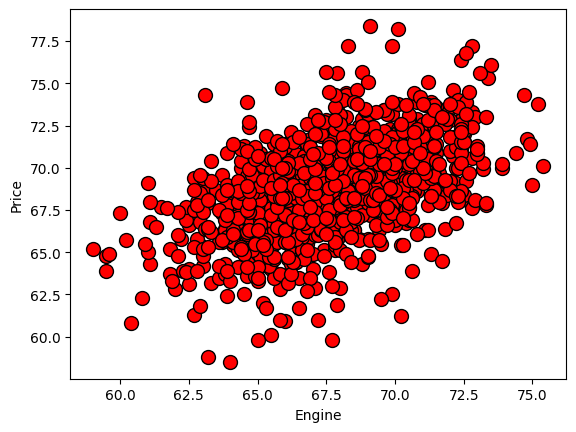

In [ ]:
plotData(X, y)

In [ ]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [ ]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [ ]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [ ]:
# Definir valores de theta para los que quieres calcular el costo
theta_1 = np.array([0.0, 0.0])
theta_2 = np.array([-1.0, 2.0])

# Calcular el costo para estos valores de theta
J1 = computeCost(X, y, theta_1)
J2 = computeCost(X, y, theta_2)

print(f"Con theta = {theta_1} el costo calculado es: {J1:.2f}")
print(f"Con theta = {theta_2} el costo calculado es: {J2:.2f}")

Con theta = [0. 0.] el costo calculado es: 2362.72
Con theta = [-1.  2.] el costo calculado es: 2168.83


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        # Calcula la predicción del modelo
        h = np.dot(X, theta)

        # Calcula el error
        error = h - y
        gradient = (1/m) * np.dot(X.T, error)

        # Actualiza los parámetros theta
        theta = theta - alpha * gradient

        # Guarda el costo J en cada iteración
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [ ]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 500
alpha = 0.0001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(f"Costo final después de {iterations} iteraciones: {J_history[-1]:.2f}")

Theta encontrada por descenso gradiente: 0.0177, 1.0137
Costo final después de 500 iteraciones: 3.91


Se utilizan los parametros finales para grafical la linea.

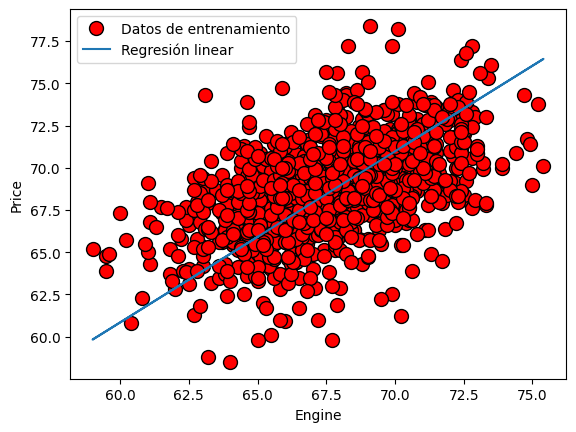

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [ ]:
# Suponiendo que theta contiene los valores optimizados
# y que quiero predecir la altura del hijo que tiene un padre que mide 70.4 inch

# Altura del Padre
Altura_Padre = 70.4

# Crear el vector de entrada para la predicción (agregar 1 para el término de sesgo)
X_pred = np.array([1, Altura_Padre])

# Hacer la predicción
predicted_score = np.dot(X_pred, theta)

print(f"Predicción de la calificación para {Altura_Padre} altura del hijo: {predicted_score:.2f}")


Predicción de la calificación para 70.4 altura del hijo: 71.38


### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

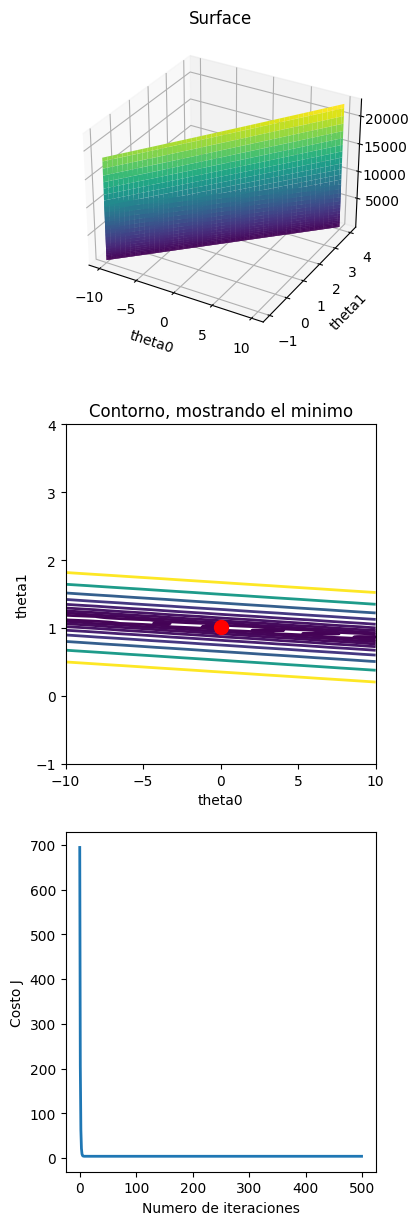

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass